In [4]:
import numpy as np
import torch

In [5]:
histograms = np.load("histograms.npy")
labels = np.load("labels.npy")

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(histograms, labels, test_size=0.2)

In [20]:
from torch.utils.data import DataLoader
import torch.nn as nn

BATCH_SIZE = 8

loader_train = DataLoader(
    list(zip(x_train, y_train)),
    shuffle=True,
    batch_size=BATCH_SIZE
)

loader_test = DataLoader(
    list(zip(x_test, y_test)),
    shuffle=True,
    batch_size=BATCH_SIZE
)

In [7]:
class MLP(torch.nn.Module):
    
    def __init__(self):
        super(MLP, self).__init__()
        self.input = nn.Linear(64, 32)
        self.hidden = nn.Linear(32, 32)
        self.output = nn.Linear(32,2)
        
    def forward(self, x):
        x = nn.ReLU()(self.input(x))
        x = nn.ReLU()(self.hidden(x))
        x = self.output(x)
        return x

In [8]:
model = MLP()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
loss_func = torch.nn.MSELoss()

EPOCHS = 10

losses = []

for epoch in range(EPOCHS):
        
    for batch in loader_train:
        
        optimizer.zero_grad()
        x, y = batch
        loss = loss_func(model(x.float()), y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

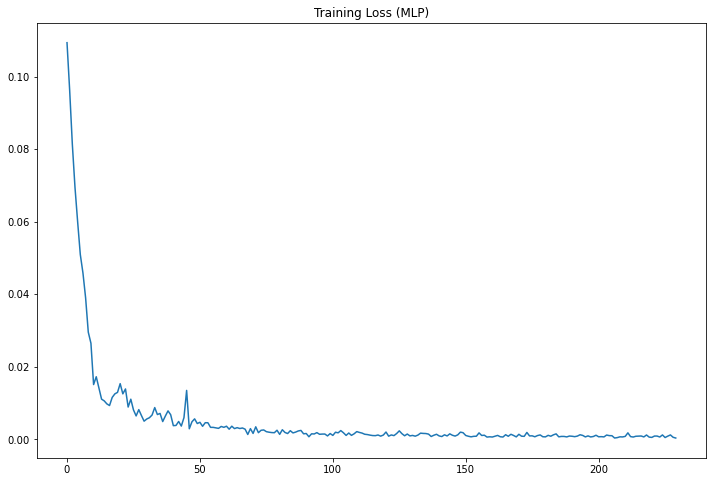

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title("Training Loss (MLP)")
plt.plot(losses)

In [10]:
with torch.no_grad():
    
    losses = []
                   
    for batch in loader_train:
        
        optimizer.zero_grad()
        x, y = batch
        pred = model(x.float())
        loss = loss_func(model(x.float()), y)
        losses.append(loss.item())
        
print("MSE: {}".format(np.mean(losses)))

MSE: 0.0007496035326292496


In [21]:
import pickle

with open('img_tensors.pickle', 'rb') as handle:
    img_tensors = pickle.load(handle)

In [22]:
labels = np.load("labels.npy")

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img_tensors, labels, test_size=0.2)

loader_train = DataLoader(
    list(zip(x_train, y_train)),
    shuffle=True,
    batch_size=BATCH_SIZE
)

loader_test = DataLoader(
    list(zip(x_test, y_test)),
    shuffle=True,
    batch_size=BATCH_SIZE
)

In [38]:
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5, 3)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.conv3 = nn.Conv2d(32, 64, 5, 3)
        self.dropout = nn.Dropout(0.5)
        self.lin1 = nn.Linear(288,50)
        self.lin2 = nn.Linear(50,2)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool3d(x, 2)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [39]:
from tqdm import tqdm

model = ConvNet()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
loss_func = torch.nn.CrossEntropyLoss()

EPOCHS = 10

losses = []

for epoch in tqdm(range(EPOCHS)):
        
    for batch in loader_train:
        
        optimizer.zero_grad()
        x, y = batch
        x = x.reshape(BATCH_SIZE,3,256,256)
        print(x.shape)
        loss = loss_func(model(x.float()), y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([8, 3, 256, 256])
torch.Size([8, 3, 256, 256])
torch.Size([8, 3, 256, 256])
torch.Size([8, 3, 256, 256])
torch.Size([8, 3, 256, 256])
torch.Size([8, 3, 256, 256])
torch.Size([8, 3, 256, 256])


  0%|          | 0/10 [00:51<?, ?it/s]


KeyboardInterrupt: 